## K-means

Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt

Load data

In [2]:
X = loadmat('data/ex7data2.mat')['X']

In [3]:
X.shape

(300, 2)

scatter plot of data

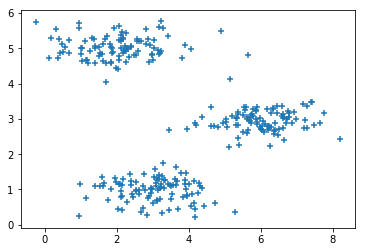

In [4]:
plt.scatter(X[:,0],X[:,1], marker='+')

define and implement functions for k-means

In [5]:
'''
X : examples
k : no of clusters/centroids
x : centroids
'''
def initCent(X, k):
    '''
    initialize k centroids
    '''
    i = np.random.choice(X.shape[0], k)
    x = X[i]
    return x

def plt_X_cent(X, x):
    '''
    scatter plot of centroids and examples
    
    '''
    plt.scatter(X[:,0],X[:,1], marker='+')
    plt.scatter(x[:,0],x[:,1], color='r')
    
def get_closer_exam(X,x):
    '''
    Obtain examples that are closer to each centroid
    '''
    c = []
    for i in range(X.shape[0]):
        pos = np.argmin(np.sqrt(np.sum((X[i] - x)**2, axis=1)))
        c.append(pos)
    return c
        
def move_cent(X, c):
    '''
    move the centroids position closer to its clustering examples
    '''
    for i in range(3):
        x[i] = (1.0/X[np.array(c) == i].shape[0])*np.sum(X[np.array(c) == i], axis = 0)
    return x

def plt_cluster(X,x, c):
    '''
    plot all clusters
    '''
    for i in range(3):
        plt.scatter(X[np.array(c)==i][:,0], X[np.array(c)==i][:,1], marker='+')
        plt.scatter(x[:,0],x[:,1], color='r')

def distortion(X, x, c):
    '''
    A measure of how well the clusters are formed
    '''
    distances = []
    for i in range(x.shape[0]):
        dis = (1.0/X[np.array(c) == i].shape[0])*np.sum(np.sqrt(np.sum((X[np.array(c) == i]-x[i])**2, axis=1)))
        distances.append(dis)
    
    return distances, (1.0/len(distances))*np.sum(np.array(distances))

## Test Run

initialize centroids positions

In [6]:
x = initCent(X,3)

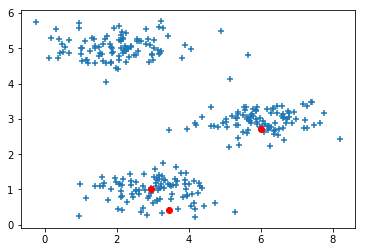

In [7]:
plt_X_cent(X,x)

find examples closer to each centroid

In [8]:
c = get_closer_exam(X, x)

move each centroid position based on it clusters

In [9]:
x = move_cent(X, c)

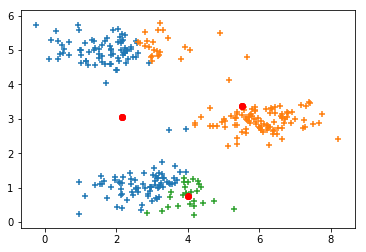

In [10]:
plt_cluster(X, x,  c)

obtain the distortion

In [11]:
dists, dist = distortion(X,x,c)

In [12]:
dist

1.3179097944259426

This steps are usually performed iteratively

In [13]:

k = 3
x = initCent(X, k)
distorts = []
for i in range(10):
    c = get_closer_exam(X, x)
    _, dist = distortion(X, x, c)
    distorts.append(dist)
    x = move_cent(X, c)

In [14]:
distorts

[1.224921837114116,
 1.2389858220534447,
 1.440266497114963,
 1.4560084789027707,
 0.8603909349939611,
 0.7936677980235035,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536]

plot of distortion at each iteration step

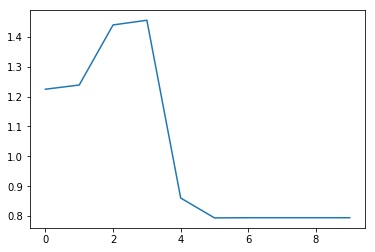

In [15]:
plt.plot(range(len(distorts)), distorts)

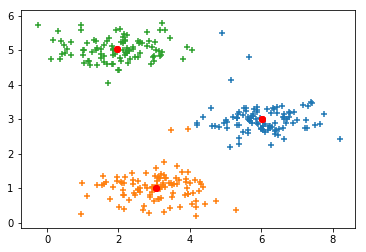

In [16]:
plt_cluster(X,x,c)